<a href="https://colab.research.google.com/gist/PatWalters/3bb9f1091d989665caf37460fec969f3/exploratory_data_analysis_with_bemis-murcko_frameworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exploratory Data Analysis With mols2grid and Bemis-Murcko Frameworks

A quick note, I tend to use the terms "scaffold" and "framework" interchangably.  Apologies if this is confusing. 

### Install Packages

In [2]:
!pip install rdkit-pypi mols2grid ipywidgets
import pyforest
import sys
sys.path.append('/Users/jayceepang/msse/ATOM_CODE/UTILS/')
from matplotlib.lines import Line2D
!pip install rdkit-pypi
!pip install mols2grid
!pip install tqdm
from rdkit.Chem import MolToSmiles

from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmilesFromSmiles, GetScaffoldForMol
import mols2grid

### Import the Necessary Libraries




In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmilesFromSmiles
import mols2grid
from tqdm.auto import tqdm
from ipywidgets import widgets
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True 

Enable Pandas **progress_apply**

In [4]:
tqdm.pandas()

### Setup

Read the SMILES data from GitHub

In [7]:
url = "/Users/jayceepang/msse/ATOM_CODE/datasets/holdout_data/"
holdout_data_path = '/Users/jayceepang/msse/ATOM_CODE/datasets/holdout_data/' 
df = pd.read_csv(f'{holdout_data_path}NEK11_uM_min_50_pct.csv')
df=df.rename(columns={'base_rdkit_smiles': 'SMILES'})

In [14]:
df

,compound_id,SMILES,active,NEK,subset,framework,mol,scaffold_idx
0,3_IN_PP1,NC1=C2C(N(C(C)(C)C)N=C2C3=CNC4=C3C=CC=C4)=NC=N1,0,NEK11,test,c1ccc2c(-c3n[nH]c4ncncc34)c[nH]c2c1,<rdkit.Chem.rdchem.Mol object at 0x149926900>,130
1,ALK_kinase_inhibitor_1,CN(CC1)CCN1C2=CC=C(NC3=NC=C4C(C(C5=C(OC)C=CC(F...,0,NEK11,test,c1ccc(-c2csc3cnc(Nc4ccc(N5CCNCC5)cc4)nc23)cc1,<rdkit.Chem.rdchem.Mol object at 0x149926890>,194
2,ALW_II_49_7,O=C(C1=CC(NC2=CC(C(NC3=CC=CC(C(F)(F)F)=C3)=O)=...,0,NEK11,test,O=C(Nc1ccccc1)c1cccc(Nc2cccnc2)c1,<rdkit.Chem.rdchem.Mol object at 0x149926970>,158
3,AMG_47a,O=C(NC1=CC=CC(C(F)(F)F)=C1)C2=CC=C(C)C(C3=CC4=...,0,NEK11,test,O=C(Nc1ccccc1)c1cccc(-c2ccc3nc(NCCN4CCOCC4)ncc...,<rdkit.Chem.rdchem.Mol object at 0x1499267b0>,159
4,AST487,O=C(NC1=CC=C(OC2=NC=NC(NC)=C2)C=C1)NC3=CC=C(CN...,0,NEK11,test,O=C(Nc1ccc(CN2CCNCC2)cc1)Nc1ccc(Oc2ccncn2)cc1,<rdkit.Chem.rdchem.Mol object at 0x149926a50>,35
...,...,...,...,...,...,...,...,...
395,ZDG_7_53_1,CN1CCN(C2=CC=CC(NC3=NC=CC(C4=CC=C(NC([C@@H]5CC...,0,NEK11,test,O=C(Nc1ccc(-c2ccnc(Nc3cccc(N4CCNCC4)c3)n2)cc1)...,<rdkit.Chem.rdchem.Mol object at 0x14993b7b0>,52
396,ZDG_7_9,O=C1N(C2CCCC2)C3=C(C=NC(NC4=CC=C(C(NCC(F)F)=O)...,0,NEK11,test,O=c1ccc2cnc(Nc3ccccc3)nc2n1C1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x14993b820>,21
397,Zanzalintinib,O=C(C1=CC2=C(OC3=CC=C(NC(C4(CC4)C(NC5=CC=C(C=C...,0,NEK11,test,O=C(Nc1ccccc1)C1(C(=O)Nc2ccc(Oc3ccnc4ccccc34)c...,<rdkit.Chem.rdchem.Mol object at 0x14993b890>,227
398,ba_03_55_11,FC(F)(F)C1=CC(NC2=NC(C3=C4C=CC=NN4N=C3)=CC=N2)...,0,NEK11,test,c1cc(Nc2nccc(-c3cnn4ncccc34)n2)cc(N2CCOCC2)c1,<rdkit.Chem.rdchem.Mol object at 0x14993b900>,11


Create a column in the dataframe with the [Bemis/Murcko framework](https://pubs.acs.org/doi/10.1021/jm9602928)

In [8]:
df['framework'] = df.SMILES.progress_apply(MurckoScaffoldSmilesFromSmiles)

  0%|          | 0/400 [00:00<?, ?it/s]

Create a column in the dataframe with an RDKit molecule object.

In [9]:
df['mol'] = df.SMILES.progress_apply(Chem.MolFromSmiles)

  0%|          | 0/400 [00:00<?, ?it/s]

### Create a DataFrame to Organize the Scaffolds



As the first part of our analysis, we'd like to look at how frequently each scaffold occurs.  We can do this with the Pandas "value_counts" funtion.  There's a cool trick (shown below) that allows you to convert the output of "value_counts" to a dataframe.  

In [10]:
scaffold_df = df.framework.value_counts().reset_index().copy() # cool trick
scaffold_df.columns = ["scaffold","count"]
# copy the index column for the dataframe to scaffold_idx
scaffold_df['scaffold_idx'] = scaffold_df.index
scaffold_df

,scaffold,count,scaffold_idx
0,c1ccc(-c2cc3nccn3c(Nc3ccccn3)n2)cc1,17,0
1,c1ccc(-c2ccnc(Nc3ccc(N4CCOCC4)cc3)n2)cc1,13,1
2,c1ccc(CCNc2ncnc3ccccc23)cc1,11,2
3,c1ccc(Nc2nccc(-c3ccccc3)n2)cc1,11,3
4,c1ccc(Nc2ncc3[nH]nc(-c4ccccc4)c3n2)cc1,11,4
...,...,...,...
223,O=c1ccc2cnc(Nc3ccc(N4CCNCC4)cc3)nc2n1C1CCCC1,1,223
224,c1ccc(COc2ccc(Nc3ccnc4ccccc34)cc2)nc1,1,224
225,O=C(Nc1cccc(Nc2cc(NCc3ccccc3)ccn2)c1)C1CCCNC1,1,225
226,O=c1[nH]c2nc(Nc3ccc4[nH]ccc4c3)ncc2cc1S(=O)(=O...,1,226


Now we'd like to create a link between the input dataframe (**df**) and the scaffold dataframe (**scaffold_df**).  In order to do this, we'll create a dictionary that maps the scaffold in **df** to an integer corresponding to the index in **scaffold_df**. 

In [13]:
scaffold_dict = dict(zip(scaffold_df.scaffold,scaffold_df.index))
df['scaffold_idx'] = [scaffold_dict[x] for x in df.framework]

### Align the Structures

One thing that really bugs me is looking at a set of congeneric molecules that are in multiple orientations.  Life is a whole lot simpler if the molecules are aligned.  Let's write a quick bit of code to align the molecules to the frameworks.  First we'll generate 2D coordinates for the scaffolds. 

In [16]:
scaffold_df['mol'] = scaffold_df['scaffold'].apply(Chem.MolFromSmiles)
crds_ok = scaffold_df.mol.progress_apply(AllChem.Compute2DCoords)

  0%|          | 0/228 [00:00<?, ?it/s]

Next, we'll loop over the scaffolds and generate structures for the corresponding molecules that are aligned to the scaffolds. 

In [18]:
for idx, scaf in tqdm(scaffold_df[["scaffold_idx","mol"]].values):
    match_df = df.query("scaffold_idx == @idx")
    for mol in match_df.mol:
        AllChem.GenerateDepictionMatching2DStructure(mol,scaf)

  0%|          | 0/228 [00:00<?, ?it/s]

### Using mols2grid to View the Scaffolds and Associated Molecules

There's a cool new feature in [mols2grid](https://github.com/cbouy/mols2grid) that allows us to define a callback that will be called when we click on a structure in the grid.  The code below defines a callback that will show a second grid with the structures of all of the molecules containing the scaffold defined in the first grid.  This allows us to quickly explore scaffolds and the associated molecules.  The top grid below shows the Bemis-Murcko scaffolds, the number of molecules with that scaffold, and the scaffold index.  Clicking on a scaffold structure displays a second grid containing molecules with that scaffold.  The lower grid shows molecules and the associated pIC50 values. Click on a structure in the scaffold grid and watch what happens. 

In [19]:
# set the size of the structures in both grids
structure_size=(195,195)
# in order to do display an output from the callback, we need to instantiate an
# instance of widgets.Ouput().  Note that the final call in this cell displays
# "output"
output = widgets.Output()
@output.capture(clear_output=True, wait=True)
def show_details(data):
    idx = int(data["scaffold_idx"])
    detail_df = df.query("scaffold_idx == @idx")
    cols_to_display = ["SMILES","pIC50","mol"]
    detail_grid = mols2grid.MolGrid(detail_df, mol_col="mol",name=f"details_{idx}",size=structure_size)
    detail_view = detail_grid.display(n_rows=2,n_cols=4,subset=["img","pIC50"],selection=False)
    display(detail_view)

# This code block is necessary to make the callback work on colab
try:
    from google import colab
except:
    pass
else:
    colab.output.register_callback("show_details", show_details)

# define the grid to show the scafffolds
scaffold_grid = mols2grid.MolGrid(scaffold_df, name="centers",mol_col="mol",size=structure_size)
scaffold_view = scaffold_grid.display(n_rows=2,
                                    n_cols=4,
                                    subset=["img","count","scaffold_idx"],
                                    selection=True,
                                    callback=show_details)
display(scaffold_view)
# show the detail grid
output

MolGridWidget(grid_id='centers')

Output()

### Using Substructure Search to Augment Scaffold Assignments

A quick scroll through the scaffolds in the top grid above shows that there are a number of benzimidazole scaffolds.  There are a couple of ways that we can focus on these.  One way is to use the substructure search capability in the mols2grid grid.  Click on the magnifying glass below the top grid above and select "SMARTS", then paste the SMARTS for benzimidazole. 
<pre>c1nc2ccccc2n1</pre>
At this point you should only see scaffolds containing benzimidazole.  If you delete the SMARTS from the search box, you should see all the scaffolds again. 


Of course, we can also do the substructure search programmatically by defining a query molecule from the SMARTS.   We can then use this query to search the dataframe and create a new column indicating whether a molecule contains the query substructure.  

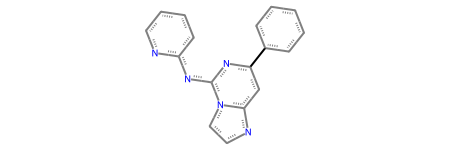

In [23]:
# benzimidazole = "c1nc2ccccc2n1"
scaffold1 = 'c1ccc(-c2cc3nccn3c(Nc3ccccn3)n2)cc1'
query = Chem.MolFromSmarts(scaffold1)
query

In [24]:
df['match'] = [x.HasSubstructMatch(query) for x in df.mol]

In [25]:
df.match.value_counts()

match
False    373
True      27
Name: count, dtype: int64

As we can see above, there are 394 molecules in the dataset that contain benzimidazole. Our next step might be to remove the benzimidazoles and examine the scaffolds in the remaining molecules. We can do this by using the ["query"](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) facility in a Pandas dataframe and selecting only rows where "match==False".  We can then repeat the operation we performed above and examine the remaining scaffolds.  I find that this sort of iterative workflow that combines Bemis-Murcko scaffolds with substructure search enables me to quickly explore and understand a dataset. 

In [26]:
scaf_df_v2 = df.query('match==False').framework.value_counts().reset_index()
scaf_df_v2.columns = ["Scaffold","Count"]
mols2grid.display(scaf_df_v2,smiles_col="Scaffold")

MolGridWidget()